In [1]:
# Standard data science imports
import numpy as np
import pandas as pd

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Statistics packages
import statsmodels.api as sm
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic

# Scikit-learn
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = "/Users/igmark/Desktop/WGU Data Files/churn_clean2.csv"
df = pd.read_csv(file_path)

In [3]:
df.info

<bound method DataFrame.info of       CaseOrder Customer_id                           Interaction  \
0             1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1             2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2             3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3             4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4             5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...         ...         ...                                   ...   
9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                                   UID          City State  \
0     e885b299883d4f9fb18e39c75155d990   Point Baker    AK   
1     f2de8bef9

In [4]:
df.info(file_path)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [5]:
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
df.shape

(10000, 50)

array([[<AxesSubplot: title={'center': 'CaseOrder'}>,
        <AxesSubplot: title={'center': 'Zip'}>,
        <AxesSubplot: title={'center': 'Lat'}>,
        <AxesSubplot: title={'center': 'Lng'}>,
        <AxesSubplot: title={'center': 'Population'}>],
       [<AxesSubplot: title={'center': 'Children'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Income'}>,
        <AxesSubplot: title={'center': 'Outage_sec_perweek'}>,
        <AxesSubplot: title={'center': 'Email'}>],
       [<AxesSubplot: title={'center': 'Contacts'}>,
        <AxesSubplot: title={'center': 'Yearly_equip_failure'}>,
        <AxesSubplot: title={'center': 'Tenure'}>,
        <AxesSubplot: title={'center': 'MonthlyCharge'}>,
        <AxesSubplot: title={'center': 'Bandwidth_GB_Year'}>],
       [<AxesSubplot: title={'center': 'Item1'}>,
        <AxesSubplot: title={'center': 'Item2'}>,
        <AxesSubplot: title={'center': 'Item3'}>,
        <AxesSubplot: title={'center': '

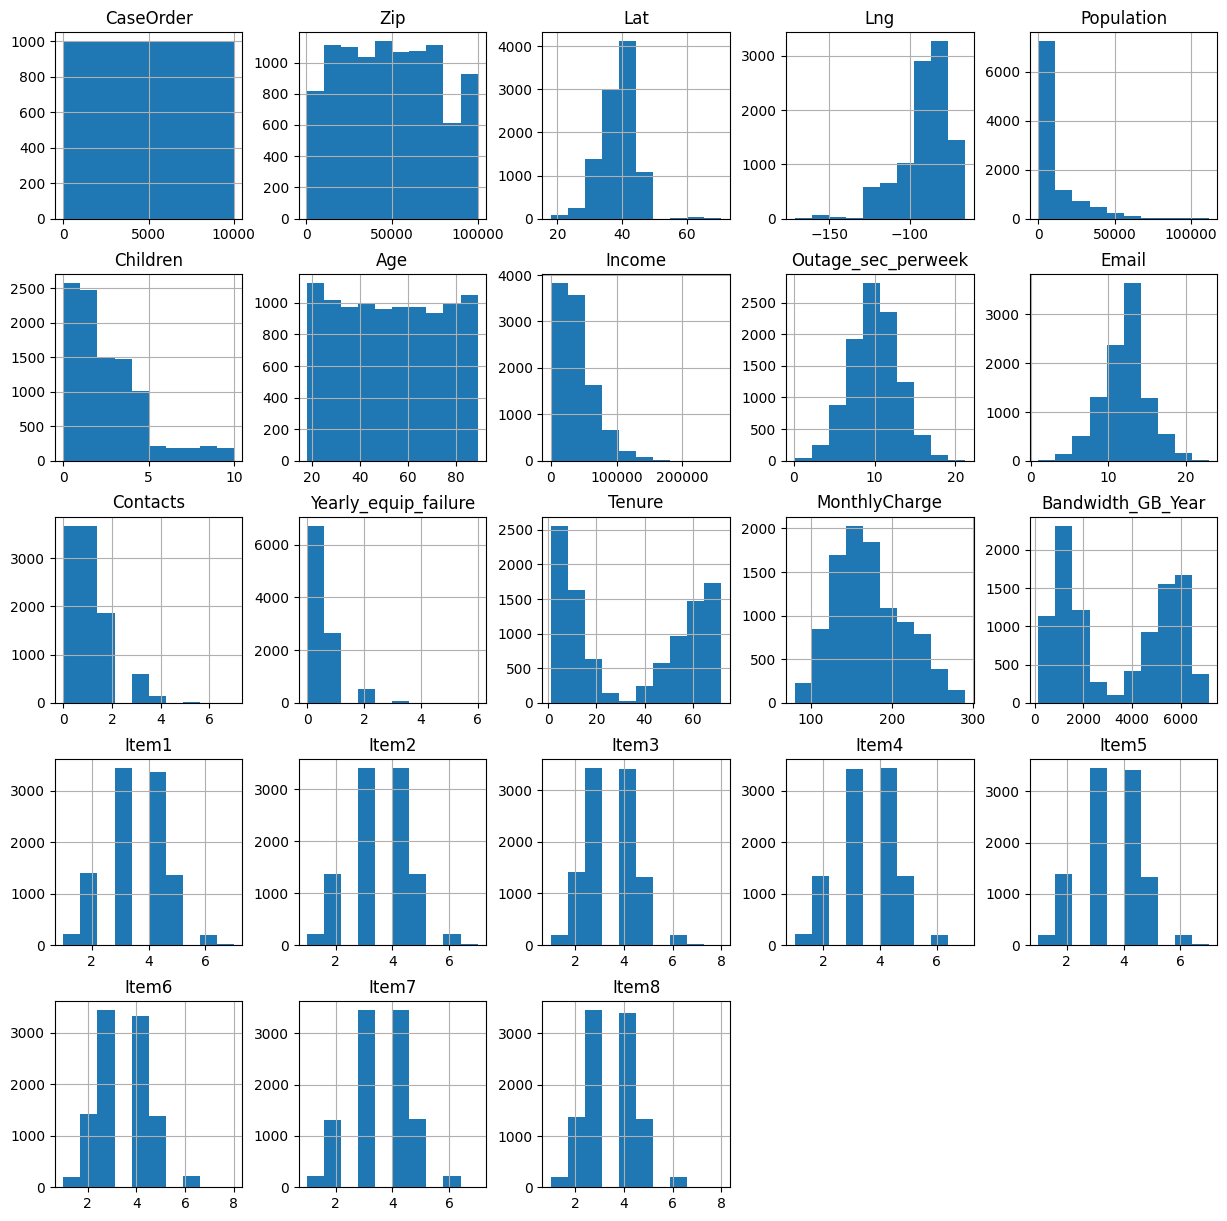

In [8]:
df.hist(figsize = (15,15))

In [9]:
# check for outliers and remove
print(df.shape)
df = df[(np.abs(stats.zscore(df.select_dtypes(include=np.number))) < 3).all(axis=1)]
print(df.shape)

(10000, 50)
(8950, 50)


In [10]:
#Drop the less meaningful columns

df = df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng',
                      'TimeZone', 'Job','Marital', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
                      'OnlineSecurity', 'OnlineBackup', 'Area','DeviceProtection', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
                      'PaymentMethod', 'Item1', 'Item2', 
                      'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

In [11]:
# Display the dimension of dataframe
df.shape

(8950, 15)

In [12]:
# display data set with all the columns
df.head() 

,Population,Children,Age,Income,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,TechSupport,Tenure,MonthlyCharge,Bandwidth_GB_Year
1,10446,1,27,21704.77,Female,Yes,11.699080,12,0,1,Yes,No,1.156681,242.632554,800.982766
2,3735,4,50,9609.57,Female,No,10.752800,9,0,1,Yes,No,15.754144,159.947583,2054.706961
3,13863,1,48,18925.23,Male,No,14.913540,15,2,0,Yes,No,17.087227,119.956840,2164.579412
4,11352,0,83,40074.19,Male,Yes,8.147417,16,2,1,No,Yes,1.670972,149.948316,271.493436
5,17701,3,83,22660.20,Female,No,8.420993,15,3,1,No,No,7.000994,185.007692,1039.357983


In [13]:
df.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,8508.409274,1.941453,53.161341,38329.400298,10.009065,12.021676,0.941676,0.374749,34.423473,172.783589,3379.459169
std,11759.988903,1.890668,20.634274,25123.528844,2.926500,3.011651,0.900798,0.582945,26.445276,42.990050,2185.204136
min,0.000000,0.000000,18.000000,348.670000,1.144796,3.000000,0.000000,0.000000,1.005104,79.978860,155.506715
25%,727.250000,0.000000,35.000000,19041.117500,8.031398,10.000000,0.000000,0.000000,7.892645,139.979239,1228.078013
50%,2750.000000,1.000000,53.000000,32778.475000,10.016014,12.000000,1.000000,0.000000,29.772986,167.484705,3120.633000
75%,11838.750000,3.000000,71.000000,52280.437500,11.961618,14.000000,2.000000,1.000000,61.389790,202.443300,5579.370794
max,52967.000000,8.000000,89.000000,124025.100000,18.851730,21.000000,3.000000,2.000000,71.999280,290.160419,7158.981530


In [14]:
df.nunique() 

Population              5414
Children                   9
Age                       72
Income                  8945
Gender                     3
Churn                      2
Outage_sec_perweek      8940
Email                     19
Contacts                   4
Yearly_equip_failure       3
Techie                     2
TechSupport                2
Tenure                  8948
MonthlyCharge            748
Bandwidth_GB_Year       8950
dtype: int64

In [15]:
df.value_counts()

Population  Children  Age  Income    Gender  Churn  Outage_sec_perweek  Email  Contacts  Yearly_equip_failure  Techie  TechSupport  Tenure     MonthlyCharge  Bandwidth_GB_Year
0           0         25   21951.91  Male    Yes    7.554437            18     0         0                     No      Yes          12.128230  194.97440      1464.752497          1
7004        2         52   53627.30  Female  Yes    9.206239            11     2         1                     No      No           3.895892   225.14570      1494.926003          1
6975        0         77   32382.90  Male    No     10.291310           15     1         1                     No      No           14.079500  159.99420      1459.766208          1
6976        1         18   36555.15  Male    No     10.868400           14     2         1                     No      Yes          7.533801   172.50340      1151.972963          1
6982        0         26   13101.08  Male    No     10.832700           7      1         0          

In [16]:
## DROP EITHER TENURE OR BANDWIDTH from previous analysis these two features were highly correlated
df = df.drop('Bandwidth_GB_Year', axis = 1)

In [17]:
# Create dummy variables in order to encode categorical, yes/no data points into 1/0 numerical values.
df['DummyChurn'] = [1 if v == 'Yes' else 0 for v in df['Churn']]
df['DummyGender'] = [1 if v == 'Male' else 0 for v in df['Gender']]
df['DummyTechie'] = [1 if v == 'Yes' else 0 for v in df['Techie']]
df['DummyTechSupport'] = [1 if v == 'Yes' else 0 for v in df['TechSupport']]

In [18]:
# Drop original categorical features from dataframe
df = df.drop(columns=['Gender', 'Churn', 'Techie','TechSupport'])

In [19]:
df.columns

Index(['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'DummyChurn', 'DummyGender', 'DummyTechie', 'DummyTechSupport'],
      dtype='object')

In [20]:
df.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,DummyChurn,DummyGender,DummyTechie,DummyTechSupport
1,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,1,0,1,0
2,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,0,0,1,0
3,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,0,1,1,0
4,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,1,1,0,1
5,17701,3,83,22660.20,8.420993,15,3,1,7.000994,185.007692,0,0,0,0


In [21]:
# Prepared dataset saved to new file 
df.to_csv('D209_prepared_churn_task2.csv', index=False)

In [22]:
# Assign values to X for all predictor features
# Assign values to y for the dependent variable
X = df[['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'DummyGender', 'DummyTechie', 'DummyTechSupport']]
y = df['DummyChurn']

# Initialize the class and call fit_transform
skbest = SelectKBest(score_func=f_classif, k='all') 
X_new = skbest.fit_transform(X, y)

# Find p-values to select statistically significant features
p_values = pd.DataFrame({'Feature': X.columns, 'p_value':skbest.pvalues_}).sort_values('p_value')
features_to_keep = p_values['Feature'][p_values['p_value'] < .05]

# Print the name of the selected features and their p-values
print("Selected Features:")
print(features_to_keep)
print("\nP-values:")
print(p_values)

Selected Features:
8               Tenure
9        MonthlyCharge
11         DummyTechie
10         DummyGender
12    DummyTechSupport
Name: Feature, dtype: object

P-values:
                 Feature        p_value
8                 Tenure   0.000000e+00
9          MonthlyCharge  3.617355e-293
11           DummyTechie   2.565685e-10
10           DummyGender   5.504573e-03
12      DummyTechSupport   3.930658e-02
5                  Email   6.638305e-02
2                    Age   3.168504e-01
6               Contacts   4.548932e-01
7   Yearly_equip_failure   5.617654e-01
1               Children   8.625467e-01
3                 Income   9.548859e-01
4     Outage_sec_perweek   9.783497e-01
0             Population   9.981893e-01


In [23]:
# Check VIF for multicollinearity issues amongst these features

# Create a new DataFrame with the selected features
X_new = X[features_to_keep]

# Calculate the VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X_new.columns
vif["VIF"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]

# Print the VIFs
print(vif)

# Perform cross-validation on the decision tree model
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
scores = cross_val_score(tree_model, X_new, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

            Feature       VIF
0            Tenure  2.457351
1     MonthlyCharge  3.887466
2       DummyTechie  1.190937
3       DummyGender  1.823764
4  DummyTechSupport  1.615528
Cross-validation scores: [0.71899441 0.7849162  0.88547486 0.87206704 0.81396648]


In [24]:
#Split the data set with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 25)

In [25]:
#Save the training and testing sets as csv files
pd.DataFrame(X_train).to_csv('X_train2.csv')
pd.DataFrame(X_test).to_csv('X_test2.csv')
pd.DataFrame(y_train).to_csv('y_train2.csv')
pd.DataFrame(y_test).to_csv('y_test2.csv')

In [26]:
# Define the hyperparameter grid to search
param_grid = {'max_depth': [2, 3, 4, 5],
              'min_samples_leaf': [1, 2, 3, 4]}

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Train the model on the training data using grid search
grid_search.fit(X_train, y_train)

# Predict the class labels of the testing data using the best model
y_pred = grid_search.predict(X_test)

# Calculate the accuracy and AUC of the best model
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("AUC:", auc)

# Print the best hyperparameters found by grid search
print("Best hyperparameters:", grid_search.best_params_)


Accuracy: 0.829050279329609
AUC: 0.7361084809845899
Best hyperparameters: {'max_depth': 2, 'min_samples_leaf': 1}


In [27]:
#Fit the decision tree model with the found parameters
dt = DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 1)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

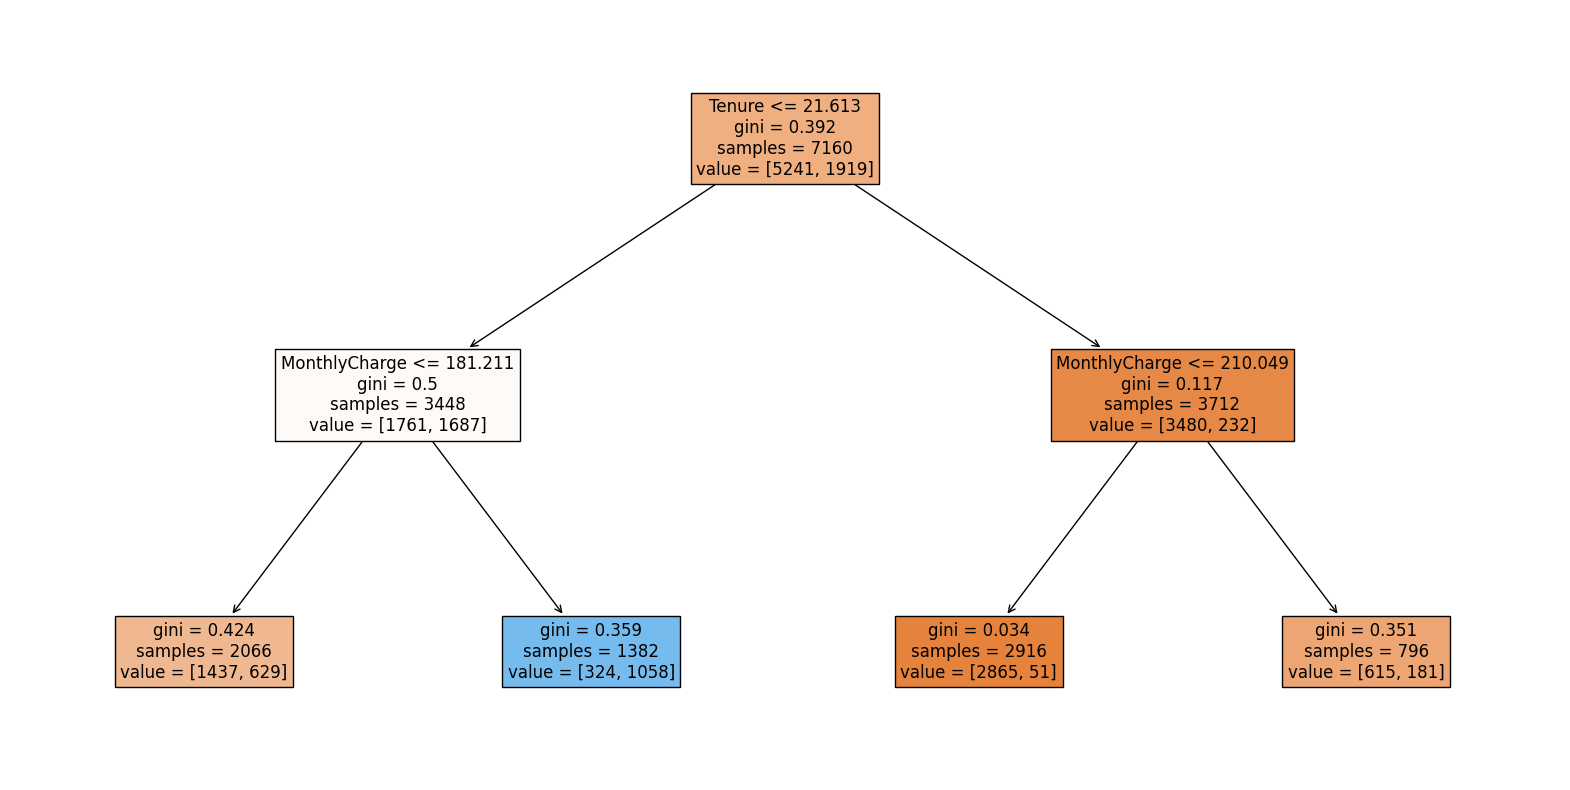

In [28]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(grid_search.best_estimator_, filled=True, fontsize=12, feature_names=X.columns)
plt.show()

In [29]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1323
           1       0.73      0.54      0.62       467

    accuracy                           0.83      1790
   macro avg       0.79      0.74      0.76      1790
weighted avg       0.82      0.83      0.82      1790



In [30]:
#Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[1231   92]
 [ 214  253]]


Text(0.5, 23.52222222222222, 'Predicted')

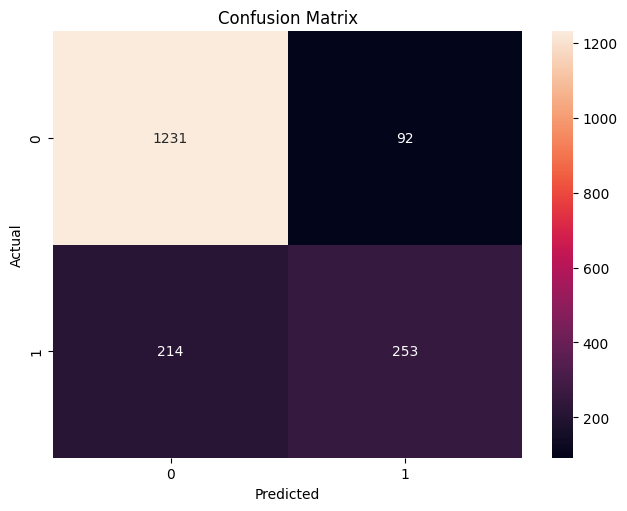

In [31]:
#Use seaborn heatmap to visualize the confusion matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, fmt = 'g')
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')


In [32]:
# Predict the class labels of the training and testing data using the best model
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

# Calculate the accuracy of the best model on the training and testing data
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Print the accuracy of the best model on the training and testing data
print("Training set accuracy:", accuracy_train)
print("Test set accuracy:", accuracy_test)


Training set accuracy: 0.8344972067039106
Test set accuracy: 0.829050279329609


In [33]:
# Assuming y_pred and y_true are the predicted and true labels respectively
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC score:", auc_roc)

AUC-ROC score: 0.7361084809845899


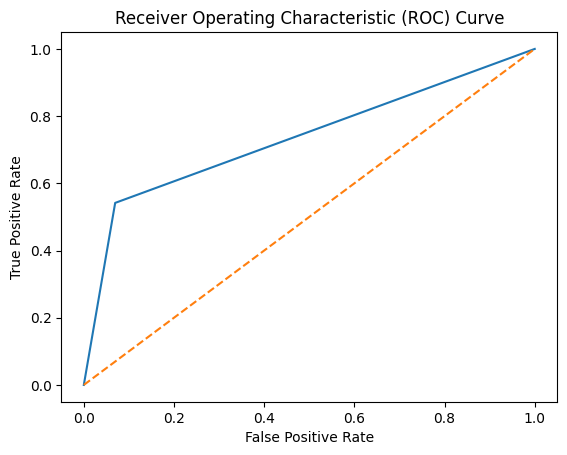

In [34]:
#ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


In [35]:
#Calculate MSE & RMSE

mse_dt = mean_squared_error(y_test, y_pred)
rmse_dt = mse_dt**(1/2)

print("Accuracy: ", dt.score(X_test, y_test))
print("Mean squared error: ", mse_dt)
print("Root mean squared error: ", rmse_dt)

Accuracy:  0.829050279329609
Mean squared error:  0.17094972067039105
Root mean squared error:  0.4134606639940383


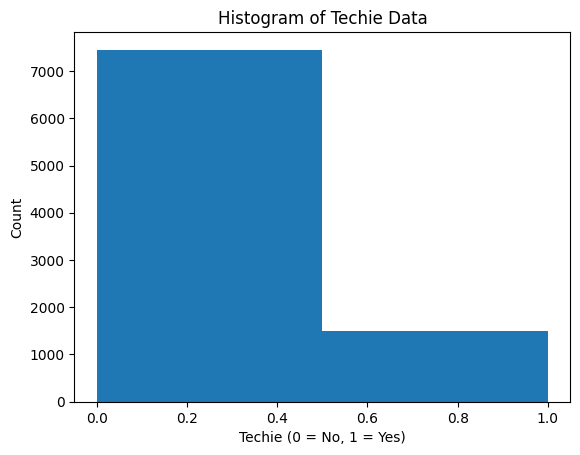

In [36]:
# Assume `df` is your Pandas DataFrame with the `churn` column
churn_data = df['DummyTechie']

# Plot a histogram of the churn data
plt.hist(churn_data, bins=2)
plt.title('Histogram of Techie Data')
plt.xlabel('Techie (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()